# CHURN PREDICTION FOR TELCO USING MACHINE LEARNING ()

In [103]:
import pandas as pd
train=pd.read_csv("churnTrain.csv")
test=pd.read_csv("churnTest.csv")

In [104]:
train.shape

(3333, 21)

In [105]:
test.shape

(425, 20)

Problems - 
1) Which customer has the highest probability to switch to another telecom
2) What could be the plausable reason why churn is happening
3) How good is the prediction? Is it reliable?

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [107]:
train.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [108]:
train.isnull().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

In [109]:
test.isnull().sum()

State                   0
Account_Length          1
Area_Code               1
Phone_No                0
International_Plan      5
Voice_Mail_Plan         4
No_Vmail_Messages       0
Total_Day_minutes       7
Total_Day_Calls         4
Total_Day_charge       11
Total_Eve_Minutes      11
Total_Eve_Calls         4
Total_Eve_Charge        5
Total_Night_Minutes    11
Total_Night_Calls       6
Total_Night_Charge      4
Total_Intl_Minutes      3
Total_Intl_Calls        5
Total_Intl_Charge       0
No_CS_Calls             0
dtype: int64

In [110]:
#GETTING RID OF NULL VALUES
test.dropna()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,MO,87.0,510.0,4019332,no,no,0,261.0,83.0,44.37,144.2,95.0,12.26,284.4,119.0,12.80,16.3,1.0,4.40,4
419,OH,69.0,415.0,3449661,no,no,0,209.6,94.0,35.63,193.1,106.0,16.41,239.9,90.0,10.80,12.4,4.0,3.35,0
420,UT,169.0,408.0,3472255,no,no,0,157.8,96.0,26.83,160.0,120.0,13.60,198.8,112.0,8.95,13.7,6.0,3.70,3
423,TN,53.0,510.0,3998108,no,no,0,100.2,85.0,17.03,213.8,90.0,18.17,299.8,67.0,13.49,7.7,4.0,2.08,3


In [111]:
test.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2


In [112]:
train["Area_Code"]="area_code_"+train["Area_Code"].astype(str)
train["Phone_No"]="phone_no_"+train["Phone_No"].astype(str)

In [113]:
train_cat=train.select_dtypes(exclude=["number","float_"])

In [114]:
train_cat.head()

,State,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,Churn
0,KS,area_code_415,phone_no_3824657,no,yes,False
1,OH,area_code_415,phone_no_3717191,no,yes,False
2,NJ,area_code_415,phone_no_3581921,no,no,False
3,OH,area_code_408,phone_no_3759999,yes,no,False
4,OK,area_code_415,phone_no_3306626,yes,no,False


In [115]:
train_num=train.select_dtypes(exclude=["bool_","object_"])
train_num.head()

,Account_Length,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [116]:
#Exploratory Data Analysis
corr_abs=train.corr().abs()

In [117]:
corr_abs

,Account_Length,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
Account_Length,1.000000,0.004628,0.006216,0.038470,0.006214,0.006757,0.019260,0.006745,0.008955,0.013176,0.008960,0.009514,0.020661,0.009546,0.003796,0.016541
No_Vmail_Messages,0.004628,1.000000,0.000778,0.009548,0.000776,0.017562,0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,0.013263,0.089728
Total_Day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,0.010155,0.008033,0.010092,0.013423,0.205151
Total_Day_Calls,0.038470,0.009548,0.006750,1.000000,0.006753,0.021451,0.006462,0.021449,0.022938,0.019557,0.022927,0.021565,0.004574,0.021666,0.018942,0.018459
Total_Day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,0.010157,0.008032,0.010094,0.013427,0.205151
Total_Eve_Minutes,0.006757,0.017562,0.007043,0.021451,0.007050,1.000000,0.011430,1.000000,0.012584,0.007586,0.012593,0.011035,0.002541,0.011067,0.012985,0.092796
Total_Eve_Calls,0.019260,0.005864,0.015769,0.006462,0.015769,0.011430,1.000000,0.011423,0.002093,0.007710,0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total_Eve_Charge,0.006745,0.017578,0.007029,0.021449,0.007036,1.000000,0.011423,1.000000,0.012592,0.007596,0.012601,0.011043,0.002541,0.011074,0.012987,0.092786
Total_Night_Minutes,0.008955,0.007681,0.004323,0.022938,0.004324,0.012584,0.002093,0.012592,1.000000,0.011204,0.999999,0.015207,0.012353,0.015180,0.009288,0.035493
Total_Night_Calls,0.013176,0.007123,0.022972,0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,0.013605,0.000305,0.013630,0.012802,0.006141


In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
import seaborn as sns

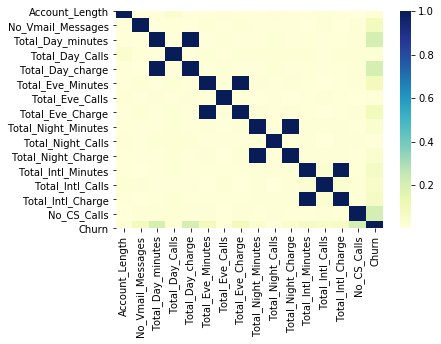

In [120]:
sns.heatmap(corr_abs,cmap="YlGnBu")

In [121]:
#We have a very high correlation between 
#1) Total Day Minutes and Total Day Charge
#2) Total Eve Minutes and Total Eve Charge
#3) Total Night Minutes and Total Night Charge
#4) Total Intl Minutes and Total Intl Charge
#- Which makes sense because more minutes talk results in more charge!

In [122]:
#We are going to drop these 4 columns because they are not going to help our prediction model

In [123]:
train.drop(["Total_Day_charge","Total_Eve_Charge","Total_Night_Charge","Total_Intl_Charge"],axis=1,inplace=True)
test.drop(["Total_Day_charge","Total_Eve_Charge","Total_Night_Charge","Total_Intl_Charge"],axis=1,inplace=True)

In [124]:
train.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,No_CS_Calls,Churn
0,KS,128,area_code_415,phone_no_3824657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,area_code_415,phone_no_3717191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,area_code_415,phone_no_3581921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,area_code_408,phone_no_3759999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,area_code_415,phone_no_3306626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [125]:
test.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,211.9,73.0,236.0,73.0,10.6,3.0,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,244.8,139.0,94.2,81.0,9.5,7.0,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,237.3,105.0,300.3,127.0,13.7,6.0,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,126.4,88.0,220.6,82.0,15.7,2.0,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,124.0,101.0,204.5,107.0,7.7,4.0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192509EA088>,
      dtype=object)

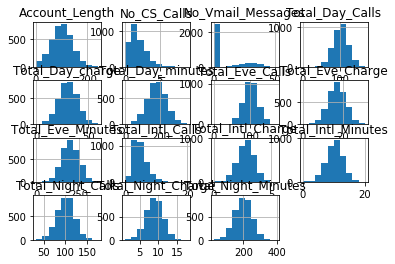

In [126]:
#Plotting Numerical Variables to understand the distribution

train_num.hist()

In [128]:
#Many of are numericles columns are normally distributed, which is good. 
#However, we have to take care of the ones which are skewed or have partial values

In [1]:
#Plotting Categorical Values to check the data distribution
f=pd.melt(train,value_vars=sorted(train_cat))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

NameError: name 'pd' is not defined

In [129]:
#We can see that our categorical values also have biased results. Also, for majority of the data, Churn is False.
#We have to consider this too while chosing our model.

In [136]:
len(train[train['Churn']==True])/len(train)
#Only 15% data has Churn True

0.14491449144914492

In [137]:
train_cat.head()

,State,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,Churn
0,KS,area_code_415,phone_no_3824657,no,yes,False
1,OH,area_code_415,phone_no_3717191,no,yes,False
2,NJ,area_code_415,phone_no_3581921,no,no,False
3,OH,area_code_408,phone_no_3759999,yes,no,False
4,OK,area_code_415,phone_no_3306626,yes,no,False


In [139]:
#Converting Categorical variables to numerical
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

train['State']=label_encoder.fit_transform(train['State'])
train['Area_Code']=label_encoder.fit_transform(train['Area_Code'])
train['Phone_No']=label_encoder.fit_transform(train['Phone_No'])
train['International_Plan']=label_encoder.fit_transform(train['International_Plan'])
train['Voice_Mail_Plan']=label_encoder.fit_transform(train['Voice_Mail_Plan'])
train['Churn']=label_encoder.fit_transform(train['Churn'])


In [140]:
train.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,No_CS_Calls,Churn
0,16,128,1,1926,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,1,1575,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,1,1117,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,0,1707,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,1,110,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [141]:
train.dtypes

State                    int32
Account_Length           int64
Area_Code                int32
Phone_No                 int32
International_Plan       int32
Voice_Mail_Plan          int32
No_Vmail_Messages        int64
Total_Day_minutes      float64
Total_Day_Calls          int64
Total_Eve_Minutes      float64
Total_Eve_Calls          int64
Total_Night_Minutes    float64
Total_Night_Calls        int64
Total_Intl_Minutes     float64
Total_Intl_Calls         int64
No_CS_Calls              int64
Churn                    int64
dtype: object

In [142]:
#Making Input and Output variable
Y=train['Churn']
X=train.loc[:,train.columns!='Churn']

In [145]:
X.shape

(3333, 16)

In [148]:
#Standardization of Data (Mean 0 and Std 1)
scalar=preprocessing.StandardScaler()
X=scalar.fit_transform(X)

# BUILDING MODELS

In [164]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#Since number of Churn is very less we are going to split our train test data for our model using KFold.
#Equal proportion of Yes and No churn for our model.

skfolds=StratifiedKFold(n_splits=10,random_state=42)
skfolds.split(X,Y)
#Other methods could be used are Under Sampling, Over Sampling and Smote

#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=42)

#Support Vector Machines (SVM)
from sklearn.svm import SVC
svc_clf=SVC(random_state=42)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)

#K-nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(random_state=42)

classifier=[gb_clf,svc_clf,rf_clf,knn_clf,dt_clf,log_clf]
name=["Gradient Boost Classifier","SVM","Random Forest Classifier","KNN Classifier","Decision Tree Classifier","Logistic Regression"]

def model_implement(classifier,name):
    for train_index,test_index in skfolds.split(X,Y):
        clone_clf=clone(classifier)
        X_train_folds=X[train_index]
        Y_train_folds=(Y[train_index])
        X_test_folds=X[test_index]
        Y_test_folds=(Y[test_index])
        clone_clf.fit(X_train_folds,Y_train_folds)
        y_pred=clone_clf.predict(X_test_folds)
        n_correct=sum(y_pred==Y_test_folds)
        print("Results for ",name," ",n_correct/len(y_pred))

for i,j in zip(classifier,name):
    model_implement(i,j)
    print("**********************************-----------------************************************")


Results for  Gradient Boost Classifier   0.937125748502994
Results for  Gradient Boost Classifier   0.9491017964071856
Results for  Gradient Boost Classifier   0.9401197604790419
Results for  Gradient Boost Classifier   0.93993993993994
Results for  Gradient Boost Classifier   0.9669669669669669
Results for  Gradient Boost Classifier   0.9519519519519519
Results for  Gradient Boost Classifier   0.9579579579579579
Results for  Gradient Boost Classifier   0.9459459459459459
Results for  Gradient Boost Classifier   0.9459459459459459
Results for  Gradient Boost Classifier   0.963963963963964
**********************************-----------------************************************
Results for  SVM   0.9041916167664671
Results for  SVM   0.9011976047904192
Results for  SVM   0.8982035928143712
Results for  SVM   0.9009009009009009
Results for  SVM   0.918918918918919
Results for  SVM   0.918918918918919
Results for  SVM   0.9219219219219219
Results for  SVM   0.8978978978978979
Results for  S

# CONFUSION/PERFORMANCE MATRIX

In [165]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(gb_clf,X,Y,cv=10)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y,y_pred)

array([[2813,   37],
       [ 130,  353]], dtype=int64)

In [167]:
#Confusion matrix description
#2813 TRUE NEGATIVES (TN) - Not churn and predicted as no churn
#37 FALSE POSITIVES (FP) - Were not churn but were predicted as churn
#353 TRUE POSITIVES (TP) - Were churn and predicted as churn
#130 FALSE NEGATIVES (FN) - Were churn but predicted as no churn

#If a customer is predicted as churn but they don't, this is used to calculate precision
#Precision = TP/(TP+FP)

#If a customer is predicted as no churn but they churn, this is used to calculate recall
#Recall = TP/(TP+FN)

from sklearn.metrics import precision_score, recall_score
print("The precision is ",precision_score(Y,y_pred))
print("The recall is ", recall_score(Y,y_pred))

The precision is  0.9051282051282051
The recall is  0.7308488612836439


In [172]:
#Plotting the threshold
y_scores=cross_val_predict(gb_clf,X,Y,cv=10,method="decision_function")

#Using the y_scores we can calculate thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds=precision_recall_curve(Y,y_scores)

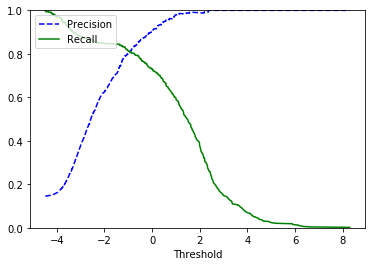

In [173]:
#Plotting Precision Recall curve
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [175]:
#New threshold is around -1 to get 80% recall
y_new_scores=(y_scores>-1.0)
print("The new precision is ",precision_score(Y,y_new_scores))
print("The new recall is ",recall_score(Y,y_new_scores))


The new precision is  0.8020408163265306
The new recall is  0.8136645962732919
